In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
    
import tubemap

In [2]:
def create_networkx_graph(tubemap_dictionary):
    dct = {}
    for i, loc in enumerate(list(tubemap_dictionary.keys())):
        dct[loc] = i
    tubemap_new = {}
    for k, v in tubemap_dictionary.items():
        tubemap_new[dct[k]] = v
    for k, v in tubemap_new.items():
        _ = []
        for place in v:
            _.append(dct[place])
        tubemap_new[k] = _
    return nx.Graph(tubemap_new)

C:\Python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


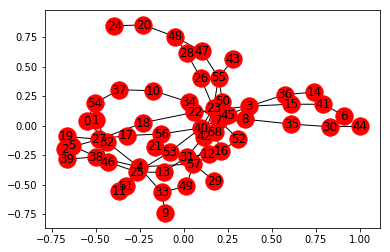

In [3]:
G = create_networkx_graph(tubemap.tubemap_dictionary)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

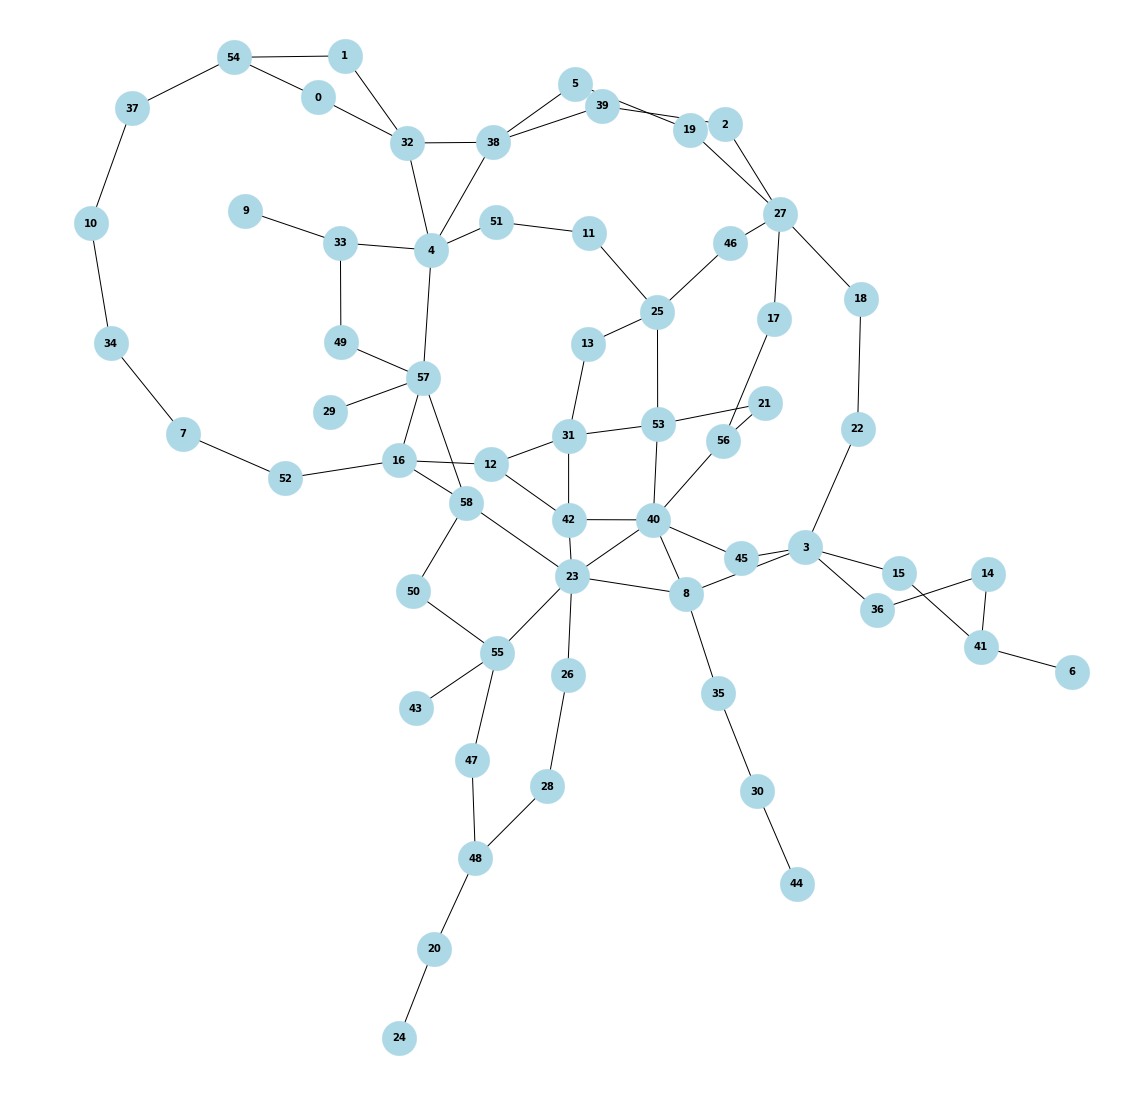

In [5]:
plt.figure(num=None, figsize=(15,15), facecolor='w', edgecolor='k')
nx.draw(G, pos = nx.nx_pydot.graphviz_layout(G), node_size=1200, \
    node_color='lightblue', linewidths=0.25, font_size=10, \
    font_weight='bold', with_labels=True)

plt.show()

In [7]:
MATRIX_SIZE = len(G)

In [58]:
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [59]:
for node in G.nodes:
    for x in G[node]:
        if x == 4:
            R[node, x] = 100
            R[x,x] = 100
        else:
            R[node, x] = 0
            R[x, node] = 0

In [60]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame(R))

     0    1    2    3      4    5    6    7    8    9    10   11   12   13  \
0  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
1  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
2  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
3  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0  0.0 -1.0 -1.0 -1.0 -1.0 -1.0   
4  -1.0 -1.0 -1.0 -1.0  100.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
5  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
6  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
7  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
8  -1.0 -1.0 -1.0  0.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
9  -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
10 -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
11 -1.0 -1.0 -1.0 -1.0   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0

In [48]:
Q = np.zeros_like(R)